In [1]:
import os
import math
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# Define the path to your dataset
data_dir = r'D:/Kuliah/Matkul/Semester 7 (MAX)/TA/Dataset/Processed'

# Define image size and batch size
img_height, img_width = 128, 128
batch_size = 16

# Use ImageDataGenerator for data loading and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

print("Class Indices:", train_generator.class_indices)

Found 2546 images belonging to 8 classes.
Found 633 images belonging to 8 classes.
Class Indices: {'R25 (Very Dark)': 0, 'R35 (Dark)': 1, 'R45 (Moderately Dark) (12 lagi)': 2, 'R55 (Medium) (27 lagi)': 3, 'R65 (Medium Light) (8 lagi)': 4, 'R75 (Light)': 5, 'R85 (Very Light)': 6, 'R95 (Extremely Light)': 7}


In [2]:
model = Sequential([
    # First Convolutional Block
    Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    BatchNormalization(), 
    Conv2D(64, (3, 3), activation='relu'), 
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25), 

    # Second Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Third Convolutional Block
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Fourth Convolutional Block
    Conv2D(512, (3, 3), activation='relu'),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Flatten the output to feed into Dense layers
    Flatten(),

    # Fully Connected Layers
    Dense(1024, activation='relu'), 
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    # Output Layer
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 62, 62, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       7

In [3]:
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size
print(steps_per_epoch)
print(validation_steps)

159
39


In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=51 
)

model.save('aksara_sunda_classifier.keras')

Epoch 1/51
159/159 [==============================] - 34s 149ms/step - loss: 2.1194 - accuracy: 0.3237 - val_loss: 4.8101 - val_accuracy: 0.1186
Epoch 2/51
159/159 [==============================] - 19s 119ms/step - loss: 1.6270 - accuracy: 0.3972 - val_loss: 3.5017 - val_accuracy: 0.1250
Epoch 3/51
159/159 [==============================] - 19s 120ms/step - loss: 1.5109 - accuracy: 0.4123 - val_loss: 2.1965 - val_accuracy: 0.2660
Epoch 4/51
159/159 [==============================] - 19s 120ms/step - loss: 1.4695 - accuracy: 0.4103 - val_loss: 3.0598 - val_accuracy: 0.1394
Epoch 5/51
159/159 [==============================] - 19s 119ms/step - loss: 1.3741 - accuracy: 0.4277 - val_loss: 1.5175 - val_accuracy: 0.3718
Epoch 6/51
159/159 [==============================] - 17s 109ms/step - loss: 1.3089 - accuracy: 0.4498 - val_loss: 3.5385 - val_accuracy: 0.1923
Epoch 7/51
159/159 [==============================] - 17s 106ms/step - loss: 1.2544 - accuracy: 0.4672 - val_loss: 3.2626 - val_ac

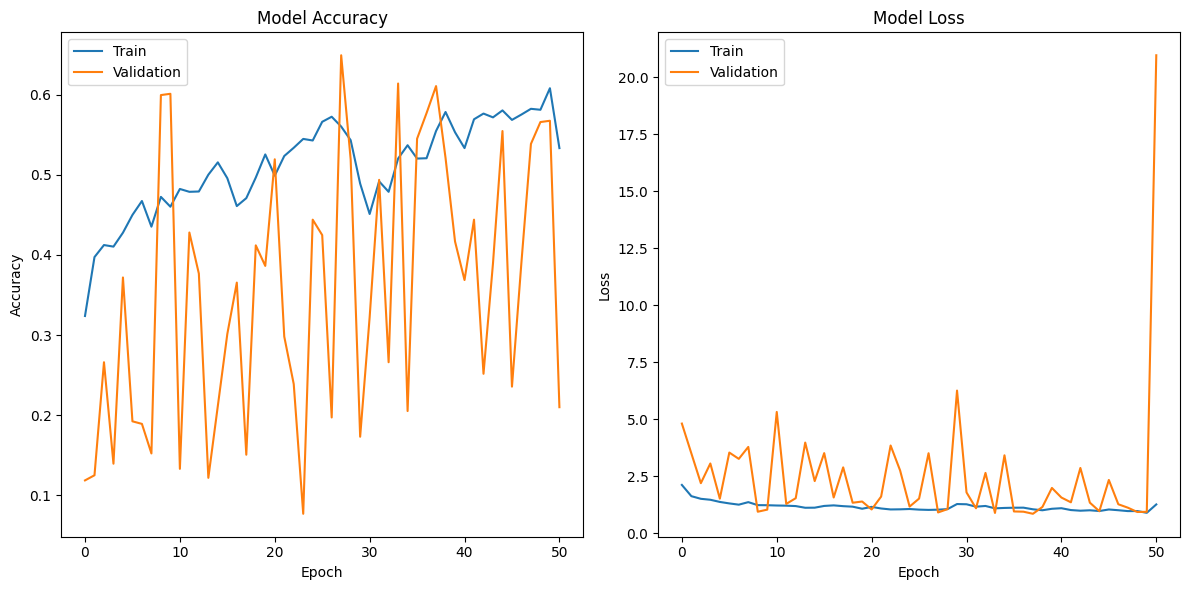

Best Epoch based on Validation Accuracy: 28
Best Epoch based on Validation Loss: 38


In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Model Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Model Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

# Find the epoch with the highest validation accuracy
best_val_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
print(f'Best Epoch based on Validation Accuracy: {best_val_epoch}')

# Find the epoch with the lowest validation loss
best_val_loss_epoch = history.history['val_loss'].index(min(history.history['val_loss'])) + 1
print(f'Best Epoch based on Validation Loss: {best_val_loss_epoch}')


In [6]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)

print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

39/39 [==============================] - 1s 29ms/step - loss: 20.9586 - accuracy: 0.2099
Validation Loss: 20.9586
Validation Accuracy: 0.2099


In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a sample image for prediction
sample_image_path = r'C:\Kuliah Tel U\KP\Data\predict\sample_image1.jpg'

img = image.load_img(sample_image_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

# Predict the class
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions, axis=1)
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index[0]]

print(f'Predicted Class: {predicted_class}')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Kuliah Tel U\\KP\\Data\\predict\\sample_image1.jpg'

In [68]:
# Save class indices
class_indices = train_generator.class_indices

# Save to a file
import json

with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)


In [69]:
# Load class indices from file
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

class_labels = {v: k for k, v in class_indices.items()}


In [70]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the saved model
model_path = 'D:\\Random_Projects\\Aksara_classification\\aksara_sunda_classifier.keras'
model = load_model(model_path)

# Load class indices
with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)

class_labels = {v: k for k, v in class_indices.items()}

# Define image dimensions
img_height, img_width = 100, 100

# List of image paths
sample_image_paths = [
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image1.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image2.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image3.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image4.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image5.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image6.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image7.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image8.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image9.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image10.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image11.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image12.jpg',
    r'C:\Kuliah Tel U\KP\Data\predict\sample_image13.jpg',
]

# Preprocess images and make predictions
for img_path in sample_image_paths:
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)
    predicted_class = class_labels.get(predicted_class_index[0], "Unknown")

    print(f'Image: {img_path} - Predicted Class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image1.jpg - Predicted Class: hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image2.jpg - Predicted Class: he
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image3.jpg - Predicted Class: hé
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image4.jpg - Predicted Class: he
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image5.jpg - Predicted Class: hé
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image6.jpg - Predicted Class: heu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image7.jpg - Predicted Class: heu
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Image: C:\Kuliah Tel U\KP\Data\predict\sample_image8.jpg - Predicted Class: hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Image: C:\Kuliah Tel U\

In [ ]:
#CROSS VALIDATION

# import os
# import numpy as np
# import pandas as pd
# from sklearn.model_selection import KFold
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# # Define the path to your dataset
# data_dir = r'C:\Kuliah Tel U\KP\Data\Sunda'

# # Get image paths and labels
# def get_image_paths_labels(data_dir):
#     class_names = sorted(os.listdir(data_dir))
#     image_paths = []
#     labels = []
    
#     for class_index, class_name in enumerate(class_names):
#         class_dir = os.path.join(data_dir, class_name)
#         for filename in os.listdir(class_dir):
#             if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
#                 image_paths.append(os.path.join(class_dir, filename))
#                 labels.append(class_index)
                
#     return np.array(image_paths), np.array(labels), class_names

# image_paths, labels, class_names = get_image_paths_labels(data_dir)

# # Define the number of folds for cross-validation
# num_folds = 5

# # Initialize K-Fold cross-validator
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# # Initialize lists to keep track of validation metrics
# val_losses = []
# val_accuracies = []

# for fold, (train_indices, val_indices) in enumerate(kf.split(image_paths)):
#     print(f'\nFold {fold+1}/{num_folds}')
    
#     # Split data for this fold
#     train_image_paths, val_image_paths = image_paths[train_indices], image_paths[val_indices]
#     train_labels, val_labels = labels[train_indices], labels[val_indices]
    
#     # Convert labels to class names
#     train_labels_str = convert_labels_to_class_names(train_labels, class_names)
#     val_labels_str = convert_labels_to_class_names(val_labels, class_names)
    
#     # Create DataFrames
#     train_df = pd.DataFrame({'filename': train_image_paths, 'class': train_labels_str})
#     val_df = pd.DataFrame({'filename': val_image_paths, 'class': val_labels_str})
    
#     # Create ImageDataGenerators
#     train_datagen = ImageDataGenerator(
#         rescale=1./255,
#         horizontal_flip=True,
#         vertical_flip=True,
#         rotation_range=20,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         brightness_range=[0.8,1.2]
#     )
    
#     val_datagen = ImageDataGenerator(rescale=1./255)
    
#     train_generator = train_datagen.flow_from_dataframe(
#         dataframe=train_df,
#         x_col='filename',
#         y_col='class',
#         target_size=(img_height, img_width),
#         batch_size=batch_size,
#         class_mode='categorical',
#         shuffle=True
#     )
    
#     validation_generator = val_datagen.flow_from_dataframe(
#         dataframe=val_df,
#         x_col='filename',
#         y_col='class',
#         target_size=(img_height, img_width),
#         batch_size=batch_size,
#         class_mode='categorical',
#         shuffle=False
#     )
    
#     # Define the CNN model
#     model = Sequential([
#         Conv2D(64, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#         BatchNormalization(),
#         Conv2D(64, (3, 3), activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),

#         Conv2D(128, (3, 3), activation='relu'),
#         BatchNormalization(),
#         Conv2D(128, (3, 3), activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),

#         Conv2D(256, (3, 3), activation='relu'),
#         BatchNormalization(),
#         Conv2D(256, (3, 3), activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),

#         Conv2D(512, (3, 3), activation='relu'),
#         BatchNormalization(),
#         Conv2D(512, (3, 3), activation='relu'),
#         MaxPooling2D(pool_size=(2, 2)),
#         Dropout(0.25),

#         Flatten(),
#         Dense(1024, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(512, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(256, activation='relu'),
#         BatchNormalization(),
#         Dropout(0.5),
#         Dense(len(class_names), activation='softmax')
#     ])
    
#     # Compile the model
#     model.compile(
#         optimizer='adam',
#         loss='categorical_crossentropy',
#         metrics=['accuracy']
#     )
    
#     # Train the model
#     history = model.fit(
#         train_generator,
#         steps_per_epoch=train_generator.samples // batch_size,
#         validation_data=validation_generator,
#         validation_steps=validation_generator.samples // batch_size,
#         epochs=51
#     )
    
#     # Evaluate the model
#     val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
    
#     # Store validation metrics
#     val_losses.append(val_loss)
#     val_accuracies.append(val_accuracy)
    
#     print(f'Validation Loss: {val_loss:.4f}')
#     print(f'Validation Accuracy: {val_accuracy:.4f}')
    
#     # Save the model for this fold (optional)
#     model.save(f'aksara_sunda_classifier_fold_{fold+1}.keras')
    
# # Print average validation metrics
# print(f'\nAverage Validation Loss: {np.mean(val_losses):.4f}')
# print(f'Average Validation Accuracy: {np.mean(val_accuracies):.4f}')
